In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2921 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1436 

[0.07743996381759644, 0.9771999716758728]

In [4]:
print(x_test[1:].shape)

pred_result = model.predict(x_test[:1])
print(pred_result.shape)
print(pred_result)
print(pred_result[0])

(9999, 28, 28)
(1, 10)
[[2.7790693e-07 1.3946525e-08 2.7179628e-06 4.3772632e-04 9.2894711e-12
  1.2380848e-08 3.3131080e-13 9.9955195e-01 6.8251711e-07 6.5757422e-06]]
[2.7790693e-07 1.3946525e-08 2.7179628e-06 4.3772632e-04 9.2894711e-12
 1.2380848e-08 3.3131080e-13 9.9955195e-01 6.8251711e-07 6.5757422e-06]


In [5]:
import numpy as np

one_pred = pred_result[0]
print(one_pred.sum())

one = np.argmax(one_pred)
print(one)

0.9999999
7


In [6]:
import numpy as np

one_pred = pred_result[0]
print(tf.reduce_sum(one_pred))
print(tf.reduce_sum(one_pred).numpy())
print(tf.argmax(one_pred).numpy())

tf.Tensor(0.99999994, shape=(), dtype=float32)
0.99999994
7


In [7]:
import numpy as np

print(np.argmax([5, 4, 10, 1, 2]))
print(np.argmax([3, 1, 4, 9, 6, 7, 2]))
print(np.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

2
3
[1 0 2]


In [8]:
import numpy as np

print(tf.argmax([5, 4, 10, 1, 2]))
print(tf.argmax([3, 1, 4, 9, 6, 7, 2]))
print(tf.argmax([[0.1, 0.8, 0.1], [0.7, 0.2, 0.1], [0.2, 0.1, 0.7]], axis=1))

tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor([1 0 2], shape=(3,), dtype=int64)


0.9999999
7


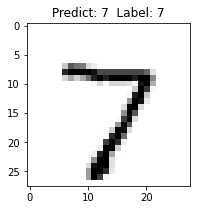

In [9]:
import numpy as np

one_pred = pred_result[0]
print(one_pred.sum())

one = np.argmax(one_pred)
print(one)

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
tmp = "Predict: " + str(one) + "  Label: " + str(y_test[0])
plt.title(tmp)
_ = plt.imshow(x_test[0], cmap='Greys')

In [10]:
import numpy as np

x = np.array([2, 3, 254, 5, 6, 3])
x = x / 255.0
print(x)

x = x.reshape(2, 3)
print(x)

x = x.flatten()
print(x)

[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]
[[0.00784314 0.01176471 0.99607843]
 [0.01960784 0.02352941 0.01176471]]
[0.00784314 0.01176471 0.99607843 0.01960784 0.02352941 0.01176471]


In [11]:
from random import sample
import numpy as np

pred_result = model.predict(x_test)
print(pred_result.shape)
print(pred_result[0])
print(np.argmax(pred_result[0]))

pred_labels = np.argmax(pred_result, axis=1)
print(pred_labels)
print(y_test)

(10000, 10)
[2.7790639e-07 1.3946498e-08 2.7179628e-06 4.3772612e-04 9.2894884e-12
 1.2380848e-08 3.3131015e-13 9.9955195e-01 6.8251654e-07 6.5757358e-06]
7
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [12]:
data = np.arange(1, 11).reshape(5, 2).astype(np.float32)
print(data)
np.sum(data)

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]]


55.0

In [13]:
tf.random.set_seed(0)
layer = tf.keras.layers.Dropout(.3, input_shape=(2,))
outputs = layer(data, training=True)
print(outputs)
np.sum(outputs)

tf.Tensor(
[[ 0.         0.       ]
 [ 4.285714   5.714286 ]
 [ 7.1428576  8.571428 ]
 [10.        11.428572 ]
 [12.857143   0.       ]], shape=(5, 2), dtype=float32)


60.0

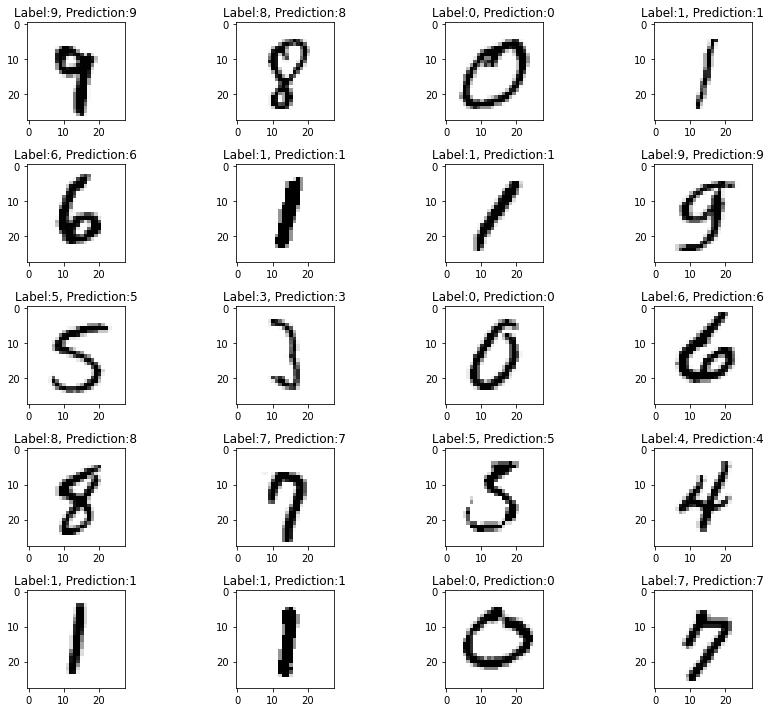

In [14]:
from random import sample
import numpy as np

pred_result = model.predict(x_test)

pred_labels = np.argmax(pred_result, axis=1)
nrows, ncols = 5, 4
samples = sorted(sample(range(len(x_test)), nrows * ncols))

count = 0
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    cmap = 'Greys' if ( pred_labels[n] == y_test[n]) else 'Blues'
    plt.imshow(x_test[n].reshape(28, 28), cmap=cmap, interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

정답이 틀린 수 228
[2488, 4176, 3943, 1878, 2293, 9634, 591, 5676, 2863, 1039, 5955, 6166, 1553, 3727, 3811, 951, 947, 3869, 5937, 9729]


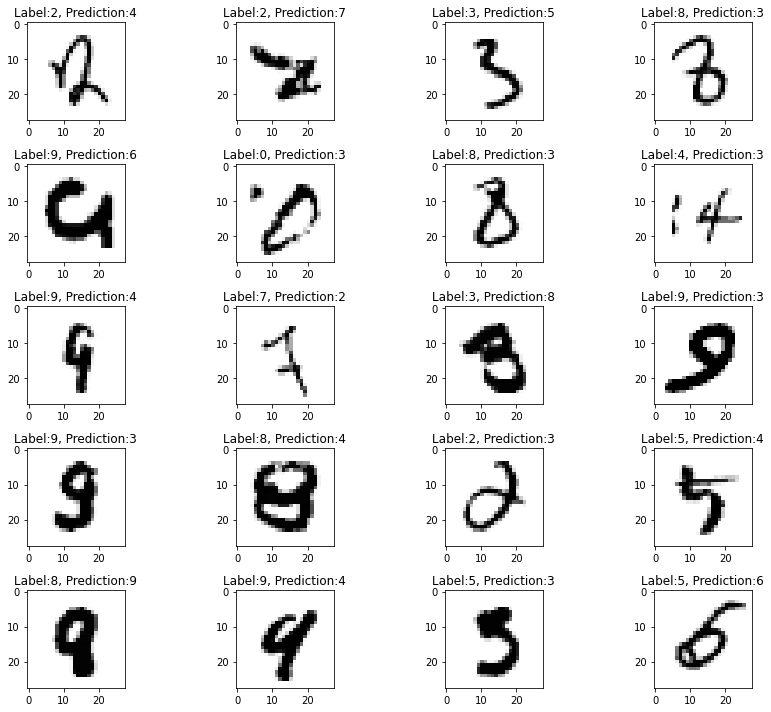

In [15]:
from random import sample
import numpy as np

mispred = []
pred_result = model.predict(x_test)

pred_labels = np.argmax(pred_result, axis=1)

for n in range(0, len(y_test)):
    if pred_labels[n] != y_test[n]:
        mispred.append(n)
print('정답이 틀린 수', len(mispred))

samples = sample(mispred, 20)
print(samples)

count = 0
nrows, ncols = 5, 4
plt.figure(figsize=(12,10))
for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(y_test[n]) + ", Prediction:" + str(pred_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [16]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2951 - accuracy: 0.9143
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1420 - accuracy: 0.9579
Epoch 3/10
1875/1875 [====================

[0.07338511943817139, 0.9783999919891357]

In [17]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation='softmax')                                     
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, epochs=20)

model.evaluate(x_test, y_test)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

[0.08310713618993759, 0.9797999858856201]

In [18]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape((60000, 28*28))
x_test = x_test.reshape((10000, 28*28))

model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2987 - accuracy: 0.9131
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1458 - accuracy: 0.9565
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 

[0.07629268616437912, 0.9761999845504761]